In [1]:
import pandas as pd

In [3]:
data = pd.read_csv("C:\\Users\\Admin\\Downloads\\archive (5)\\Admission_predict.csv")

In [4]:
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [8]:
data.loc[data["Chance of Admit "]>=0.5,"Chance of Admit "]=1
data.loc[data["Chance of Admit "]<0.5,"Chance of Admit "]=0

In [10]:
data['Chance of Admit '] = data['Chance of Admit '].astype(int)

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
columns = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research']
x = data[columns]
y = data['Chance of Admit ']

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 20)

In [14]:
print(x_train)
print(x_test)
print(y_test)
print(y_train)

     GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research
94         303           99                  3  2.0   2.5  7.66         0
91         299           97                  3  5.0   3.5  7.66         0
89         316          109                  4  4.5   3.5  8.76         1
329        297           96                  2  2.5   1.5  7.89         0
129        333          118                  5  5.0   5.0  9.35         1
..         ...          ...                ...  ...   ...   ...       ...
393        317          104                  2  3.0   3.0  8.76         0
218        324          110                  4  3.0   3.5  8.97         1
223        308          109                  2  3.0   4.0  8.45         0
271        299           96                  2  1.5   2.0  7.86         0
355        317          106                  2  2.0   3.5  8.12         0

[320 rows x 7 columns]
     GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research
10         325

In [15]:
from sklearn.svm import SVC

In [17]:
linearKernelClassifier = SVC(kernel='linear')
linearKernelClassifier.fit(x_train,y_train)
yPred1 = linearKernelClassifier.predict(x_test)

In [18]:
polyKernelClassifier = SVC(kernel='poly')
polyKernelClassifier.fit(x_train,y_train)
yPred2 = polyKernelClassifier.predict(x_test)

In [19]:
rbfKernelClassifier = SVC(kernel='rbf')
rbfKernelClassifier.fit(x_train,y_train)
yPred3 = rbfKernelClassifier.predict(x_test)

In [21]:
sigmoidKernelClassifier = SVC(kernel='sigmoid')
sigmoidKernelClassifier.fit(x_train,y_train)
yPred4 = sigmoidKernelClassifier.predict(x_test)

In [23]:
finalOutputdiff  = pd.DataFrame({'Actual':y_test,'Linear kernel':yPred1,'Poly kernel':yPred2,'rbf':yPred3,'sigmoid':yPred4})
finalOutputdiff.head(20)

,Actual,Linear kernel,Poly kernel,rbf,sigmoid
10,1,1,1,1,1
382,1,1,1,1,1
374,0,1,1,1,1
196,1,1,1,1,1
47,1,1,1,1,1
237,1,1,1,1,1
175,1,1,1,1,1
347,0,1,1,1,1
115,1,1,1,1,1
308,1,1,1,1,1


In [24]:
from sklearn.metrics import accuracy_score

In [36]:
accuracyScore = pd.DataFrame({'Linear kernel':accuracy_score(y_test,yPred1)
                                ,'Poly kernel':accuracy_score(y_test,yPred2),
                                'rbf':accuracy_score(y_test,yPred3),
                                'sigmoid':accuracy_score(y_test,yPred4)},index = [0])
accuracyScore

,Linear kernel,Poly kernel,rbf,sigmoid
0,0.8875,0.8875,0.8875,0.8875


In [28]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Accuracy Score')

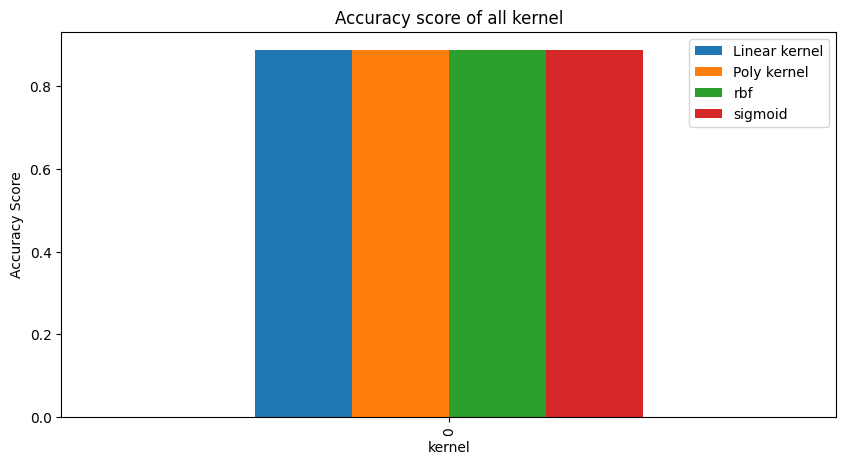

In [37]:
accuracyScore.plot(kind='bar',figsize=(10,5))
plt.title("Accuracy score of all kernel")
plt.xlabel("kernel")
plt.ylabel("Accuracy Score")

In [31]:
from sklearn.metrics import confusion_matrix

In [32]:
matrix = confusion_matrix(y_test,yPred1)

In [33]:
matrix

array([[ 0,  9],
       [ 0, 71]], dtype=int64)

In [34]:
import seaborn as sns

<AxesSubplot: >

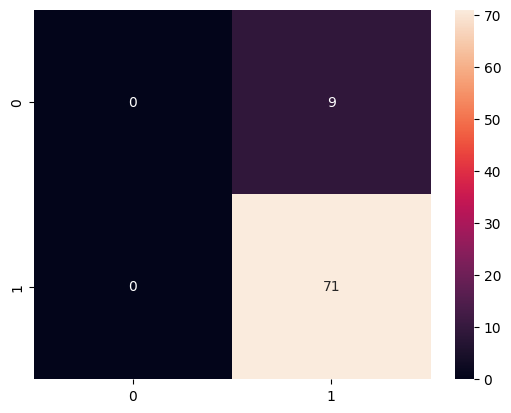

In [35]:
sns.heatmap(matrix,annot = True)